In [1]:
#-------------------- Import Packages --------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#-------------------- Load Data --------------------#
dataset = pd.read_csv('Filtered_dataset.csv')
dataset

,# name,mass,semi_major_axis,temp_eq,star_luminosity,star_radius,star_teff,star_mass,radius,star_age,orbital_period
0,51 Peg b,149.379351,0.052000,1378.334390,1.620586,1.266,5793.0,1.110,21.297063,4.000,4.230800
1,55 Cnc e,8.590902,0.015439,1996.404187,0.628520,0.980,5196.0,1.015,1.947000,10.200,0.736548
2,AF Lep b,1620.924874,8.400000,117.641346,1.980854,1.250,6130.0,1.200,14.907944,0.024,8935.000000
3,AU Mic b,36.868095,0.083050,536.171411,0.094650,0.750,3700.0,0.500,5.123625,0.022,8.463035
4,AU Mic c,32.100669,0.141700,410.654431,0.094650,0.750,3700.0,0.500,3.138515,0.022,18.859014
...,...,...,...,...,...,...,...,...,...,...,...
470,XO-4 b,513.610705,0.054850,1461.119331,2.276949,1.550,5700.0,1.320,14.762228,2.100,4.124730
471,XO-6 b,603.873973,0.081500,1576.893711,6.819966,1.930,6720.0,1.470,23.202590,1.880,3.765001
472,XO-7 b,225.340340,0.044210,1744.063777,3.000779,1.480,6250.0,1.405,15.389931,1.180,2.864142
473,kappa And b,4131.769286,100.000000,89.879687,78.438221,2.290,11361.0,2.800,13.450777,0.047,215000.000000


## Plot mass vs Radius

<IPython.core.display.Javascript object>


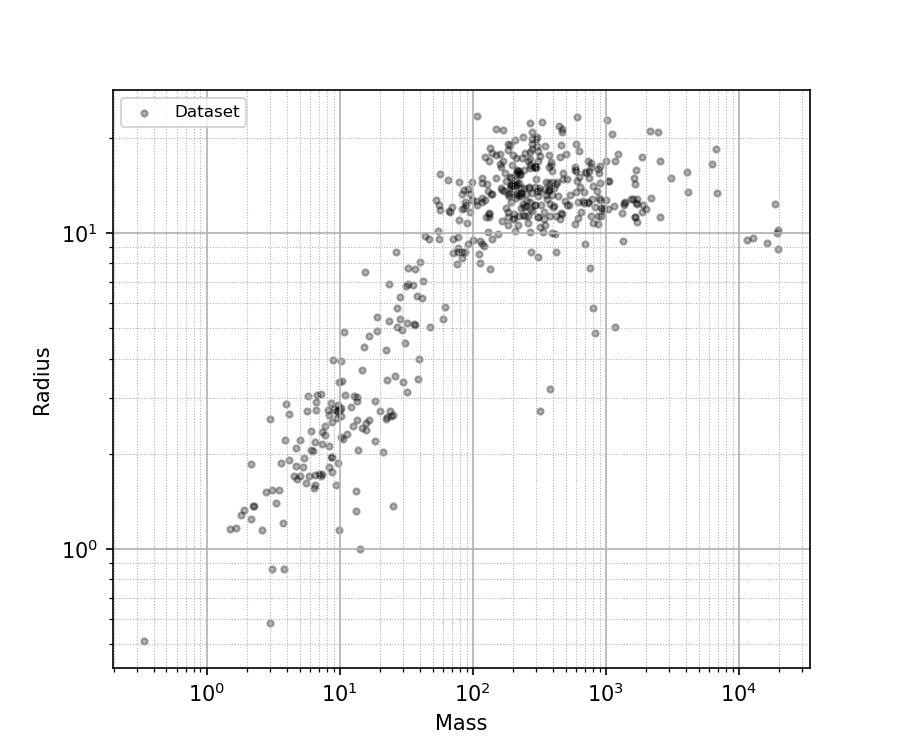

In [3]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)
ax.scatter(dataset.mass, dataset.radius, c='k', marker='.', alpha=.3, label='Dataset')
ax.legend(fontsize=8, loc="upper left")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass')
ax.set_ylabel('Radius')
ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()

## Find the outliers

I look at the planets with a radius $R < 6 R_{\oplus}$ and mass $M > 100 M_{\oplus}$ (area under main curve on middle right of plot)

I also look at the planets with a radius $R < 0.6 R_{\oplus}$ because they seem to be a bit off (bottom left corner)

In [6]:
outliers = []
for i in range(len(dataset)):
    
    if ( dataset.radius.loc[dataset.index[i]] <= 6e0 and dataset.mass.loc[dataset.index[i]] >= 1e2
    or (dataset.radius.loc[dataset.index[i]] <= 6e-1) ):
        
        outliers.append(dataset.loc[dataset.index[i]])
        
outliers_df = pd.DataFrame(outliers)
outliers_df

,# name,mass,semi_major_axis,temp_eq,star_luminosity,star_radius,star_teff,star_mass,radius,star_age,orbital_period
154,HIP 94235 b,378.851461,0.07870,1084.730305,1.349073,1.080,5991.0,1.094,3.208010,0.100,7.712121
198,K2-33 b,1175.965104,0.04090,864.907286,0.155447,1.050,3540.0,0.560,5.044041,0.009,5.424865
218,KOI-4777,0.340076,0.00800,1198.515429,0.021929,0.400,3515.0,0.410,0.510009,3.500,0.412000
220,Kepler-102 c,3.000300,0.06700,797.252197,0.301155,0.760,4909.0,0.810,0.582867,1.410,7.071420
347,TOI-251 b,317.828407,0.05741,1109.776054,0.830183,0.881,5875.0,1.036,2.739475,0.180,4.937770
399,TOI-942 b,826.036029,0.04796,1033.923572,0.436485,0.893,4969.0,0.880,4.809774,0.050,4.324190
400,TOI-942 c,794.888845,0.08470,778.012042,0.436485,0.893,4969.0,0.880,5.790559,0.050,10.156430


In [7]:
import random

no_of_colors=len(outliers)
color_list=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]
color_list

['#D8D6BF', '#1EF39A', '#DC9909', '#F6C32B', '#FCE2C0', '#5ED9DB', '#D980B1']

<IPython.core.display.Javascript object>


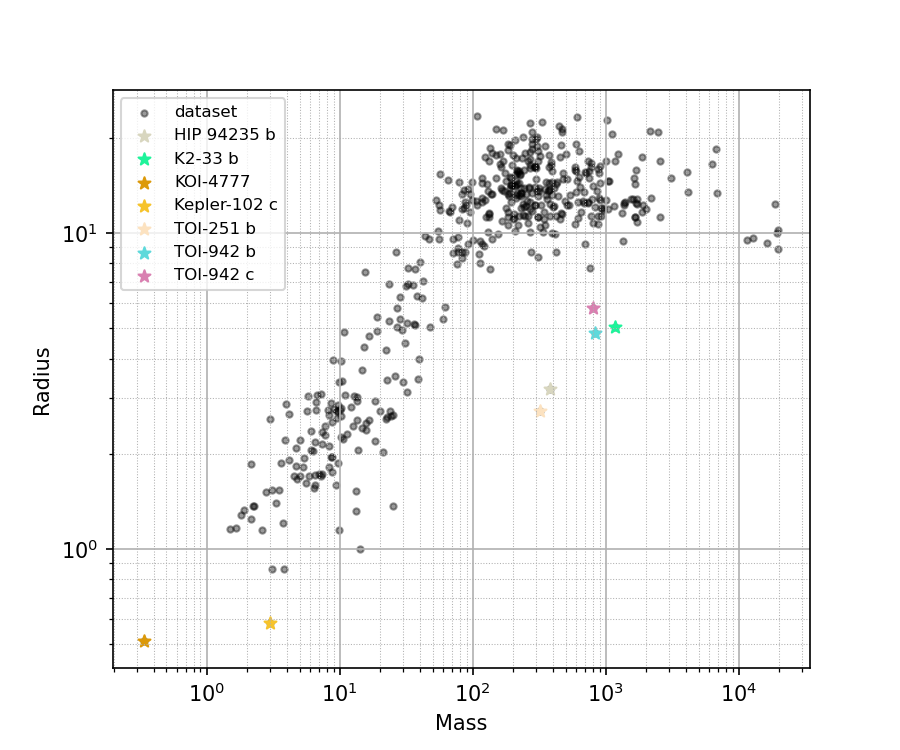

In [8]:
fig, ax = plt.subplots(figsize=(6,5),dpi=150)

ax.scatter(dataset.mass, dataset.radius, c='k', marker='.', alpha=0.4, label='dataset')

for i in range (len(outliers)):
    ax.scatter(outliers_df.mass.loc[outliers_df.index[i]], outliers_df.radius.loc[outliers_df.index[i]],
               marker='*', c=color_list[i], label=outliers_df['# name'].loc[outliers_df.index[i]])
    
# for i in range (len(outliers)):
#     ax.scatter(outliers_df.mass.loc[outliers_df.index[i]], outliers_df.radius.loc[outliers_df.index[i]],
#                marker='*', label=outliers_df['# name'].loc[outliers_df.index[i]])


ax.legend(fontsize=8, loc="upper left")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Mass')
ax.set_ylabel('Radius')

ax.grid(which='major', lw=0.8)
ax.grid(which='minor', ls=':', lw=0.5)
ax.minorticks_on()

## Articles For Each Planet

Find if someone found a better mass definition or if they are really outliers

- HIP 94235b:
    - http://exoplanet.eu/catalog/hip_94235_b/
    - A mini-Neptune transiting a bright star in the AB Doradus moving group. 
    - HIP 94235 is a G-dwarf part of a 50 au G-M binary system.
    - Discovered by Transit
    - Adopting the mass-radius relationship from Wolfgang et al. (2016), HIP 94235 b has a predicted mass of 11.2 ± 1.4 M⊕
    - Keep it on side to get its radius with our method
    
    
- K2-33 b:
    - http://exoplanet.eu/catalog/k2-33_b/
    - ~ 10 Myr, super-Neptune-sized exoplanet orbits a late-type pre-main-sequence M3.5 dwarf in the Upper Scorpius OB Association every 5.42 days.
    - The planet is 50 per cent larger than Neptune, and its mass is less than 3.6 times that of Jupiter (at 99.7 per cent confidence), with a true mass likely to be similar to that of Neptune.
    - Seems like a very specific planet 
    
    
- KOI-4777:
    - http://exoplanet.eu/catalog/koi-4777/
    - ultra-short-period planet orbiting the M dwarf KOI-4777
    - Mars sized exoplanet (Rp = 0.51 ± 0.03R⊕) orbiting the host star every 0.412 days (∼9.9 hr)
    - We see no evidence for additional massive companions using our HPF RVs.
    - We constrain the upper 3σ mass to Mp < 0.34 M⊕ by assuming the planet is less dense than iron.
    - Obtaining a mass measurement for KOI-4777.01 is beyond current instrumental capabilities.
    - Keep it on side to get its radius with our method
    
    
- Kepler-102 c:
    - http://exoplanet.eu/catalog/kepler-102_c/
    - five-planet Kepler-102 system.
    - Despite having several near resonant period ratios, we find that mean-motion resonances are unlikely to directly cause instability for plausible planet masses in this system.
    - Kepler-102 b period: 5.287  radius: 0.05 +0.10 -0.50 R⊕, Mass: 0.41 +- 1.6
    

- TOI-251 b:
    - http://exoplanet.eu/catalog/toi-251_b/
    - We report the discovery and validation of two planetary systems with ages ~300 Myr from observations by the Transiting Exoplanet Survey Satellite (TESS)
    - 2.74 R⊕ +-0.18 mini-Neptune with a 4.94 day period.


- TOI-942:
    - The 20-160 Myr old K star TOI-942 hosts a system of inflated Neptune-sized planets
    - TOI-942 b:
        - http://exoplanet.eu/catalog/toi-942_b/
        - TOI-942b orbiting in a period of 4.32 days with a radius of 4.81 -+ 0.20
    - TOI-942 c:
        - http://exoplanet.eu/catalog/toi-942_c/
        - TOI-942c orbiting in a period of 10.16 days with a radius of 5.79 -+ 0.18 0.19
    - We obtained a series of spectroscopic observations with the CHIRON facility to characterize the host star properties and constrain the masses of the planets in each system. CHIRON is a high-resolution spectrograph on the 1.5 m SMARTS telescope, located at Cerro Tololo Inter-American Observatory (CTIO), Chile.
    - 3σ mass upper limit for the 3 planets
    - The 3 planets look very specific (young hot Neptunes)